# Overview of the ECMWF Dataset and Curation Process

*Introduction:
The European Centre for Medium-Range Weather Forecasts (ECMWF) dataset is a comprehensive resource for weather forecasting, widely utilized in various domains including energy forecasting. In this Jupyter notebook, we explore a subset of the ECMWF dataset focusing on key variables related to temperature, radiance, and wind speed.

*Dataset Description:
The curated subset of the ECMWF dataset includes the following variables:

- **'t2m'**: 2-meter temperature. (K)                               (Instantenious Variable)
- **'ssrd'**: Surface solar radiation downward. (J/m^-2)            (Accumulated Variable)
- **'strd'**: Surface thermal radiation downward. (J/m^-2)          (Accumulated Variable)
- **'tisr'**: TOA incident solar radiation. (J/m^-2)                (Accumulated Variable)
- **'u10'**: Eastward 10-meter wind component. (m/s)                (Instantenious Variable)
- **'v10'**: Northward 10-meter wind component. (m/s)               (Instantenious Variable)
 
*Variable Descriptions:

1. **Temperature ('t2m')**: Represents the 2-meter temperature, providing insights into atmospheric conditions.
2. **Solar Radiation ('ssrd', 'strd', 'tisr')**: Describes solar radiation at the Earth's surface and at the top of the atmosphere, crucial for understanding energy input.
3. **Wind Speed ('u10', 'v10')**: Provides information about wind direction and speed at 10 meters above the Earths surface.

*Curation Process:

The dataset 'ECMWF_HRES_12Z_20201231.nc' was utilized for this analysis. The data was read and processed using the netCDF4 library, facilitating efficient handling of NetCDF files. Relevant variables were selected based on their importance in energy forecasting tasks, and a curated subset was extracted for visualization and analysis within this Jupyter notebook.

*Note on Data Packing:

Please note that when reading NetCDF files using netCDF4 llibrary, it should deal with "scale_factor" and "add_offset" automatically, making unpacking completely transparent to the user. This means that the user always sees the unpacked data values and doesn't have to deal with "scale_factor" and "add_offset" directly.
you can find more informations here: https://confluence.ecmwf.int/display/CKB/What+are+NetCDF+files+and+how+can+I+read+them#WhatareNetCDFfilesandhowcanIreadthem-%22scale_factor%22and%22add_offset%22

*Conclusion:
The curated subset of the ECMWF dataset provides valuable insights into weather conditions relevant to energy forecasting applications. By examining temperature, solar radiation, and wind speed data, we gain a better understanding of the atmospheric dynamics that influence energy generation and consumption patterns.


# Functions

## 3D Variable Visualization

In [55]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [56]:
def visualize(dataset):
    # Get latitude, longitude, and data from the dataset
    lats = dataset.variables['latitude'][:]
    lons = dataset.variables['longitude'][:]
    data_variable = input("Give the 3D variable you want to visualize: ")
    data = dataset.variables[data_variable][0, :, :]
    
    # Create a 3D surface plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    lons, lats = np.meshgrid(lons, lats)
    surf = ax.plot_surface(lons, lats, data, cmap='viridis')

    # Add colorbar
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    cbar.set_label('Your Data Units')

    # Add labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel(data_variable)
    plt.title('3D Surface Plot of Your Data')

    # Show the plot
    plt.show()

## Dataset Informations

In [57]:
def print_info(dataset):
    # Print dimensions
    print("Dimensions:")
    for dimname, dimobj in dataset.dimensions.items():
        print(f"  {dimname}: {len(dimobj)}")

    # Print variables and their shapes
    print("\nVariables:")
    for varname, varobj in dataset.variables.items():
        print(f"  {varname}: {varobj.shape}")

    # Print global attributes
    print("\nGlobal Attributes:")
    for attrname in dataset.ncattrs():
        print(f"  {attrname}: {getattr(dataset, attrname)}")

In [58]:
dataset = nc.Dataset("../files/EMCWF/ECMWF_HRES_12Z_20201231.nc")
print_info(dataset)

Dimensions:
  longitude: 325
  latitude: 85
  time: 91

Variables:
  longitude: (325,)
  latitude: (85,)
  time: (91,)
  fdir: (91, 85, 325)
  sp: (91, 85, 325)
  tcwv: (91, 85, 325)
  u10: (91, 85, 325)
  v10: (91, 85, 325)
  t2m: (91, 85, 325)
  d2m: (91, 85, 325)
  ssrd: (91, 85, 325)
  strd: (91, 85, 325)
  lcc: (91, 85, 325)
  tco3: (91, 85, 325)
  tisr: (91, 85, 325)
  tp: (91, 85, 325)
  fal: (91, 85, 325)

Global Attributes:
  Conventions: CF-1.6
  history: 2021-06-27 05:50:11 GMT by grib_to_netcdf-2.22.0: grib_to_netcdf /data/scratch/20210627-0540/40/_mars-webmars-private-svc-green-011-6fe5cac1a363ec1525f54343b6cc9fd8-EsONns.grib -o /data/scratch/20210627-0550/57/_grib2netcdf-webmars-private-svc-green-011-6fe5cac1a363ec1525f54343b6cc9fd8-I4wSFd.nc -utime


## Variable Description

In [59]:
def describe_variable(dataset, variable_name):
    """
    Compute basic statistics for a variable in a NetCDF dataset.
    """
    variable = dataset.variables[variable_name][:]
    
    statistics = {
        'min': np.min(variable) ,
        'max': np.max(variable),
        'mean': np.mean(variable),
        'std_dev': np.std(variable)
    }

    return statistics


## Plot of Variable Description

In [60]:
def plot_statistics(statistics):
    """
    Plot the statistics computed.
    """
    plt.figure(figsize=(8, 6))
    plt.bar(statistics.keys(), statistics.values(), color=['blue', 'orange', 'green', 'red'])
    plt.xlabel('Statistics')
    plt.ylabel('Values')
    plt.title(f'Statistics for Variable {variable_name}')
    plt.show()


## Missing Values

In [61]:
def print_missing_values(dataset):
    """
    Print the count of missing values for each variable in the NetCDF dataset.
    """
    for varname, varobj in dataset.variables.items():
        missing_values_count = np.count_nonzero(np.isnan(varobj[:]))
        print(f"Variable: {varname}, Missing Values Count: {missing_values_count}")


# Temperature

## Statistics

In [62]:
variable_name = 't2m'  # Example variable name
statistics = describe_variable(dataset, variable_name)
print(statistics)

{'min': 229.19871520996094, 'max': 305.5189208984375, 'mean': 279.2923964439328, 'std_dev': 12.267557402527}


In [63]:
plot_statistics(statistics)

## Visualizations

In [64]:
# Call the visualization function
visualize(dataset)

Give the 3D variable you want to visualize:  t2m


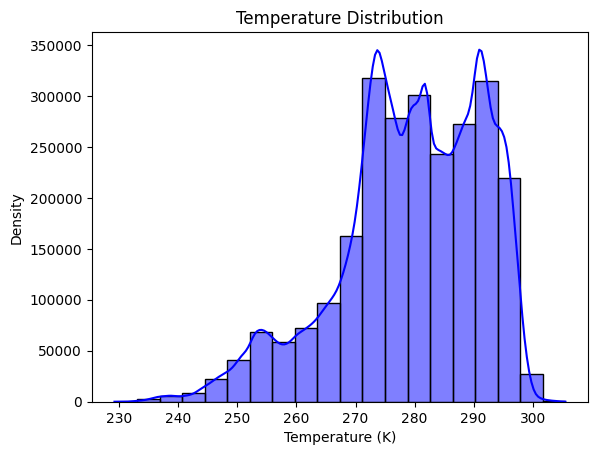

In [65]:
temperature = dataset.variables['t2m'][:]

temperature_flat = temperature.flatten()

# Plot temperature distribution
sns.histplot(temperature_flat, kde=True, color='blue', bins=20)
plt.xlabel('Temperature (K)')
plt.ylabel('Density')
plt.title('Temperature Distribution')
plt.show()

# Wind Components

## Eastward 10-meter wind component

### Statistics

In [66]:
variable_name = 'u10'  # Example variable name
statistics = describe_variable(dataset, variable_name)
print(statistics)

{'min': -25.287567138671875, 'max': 22.349899291992188, 'mean': 0.33729407672590783, 'std_dev': 4.434613643940946}


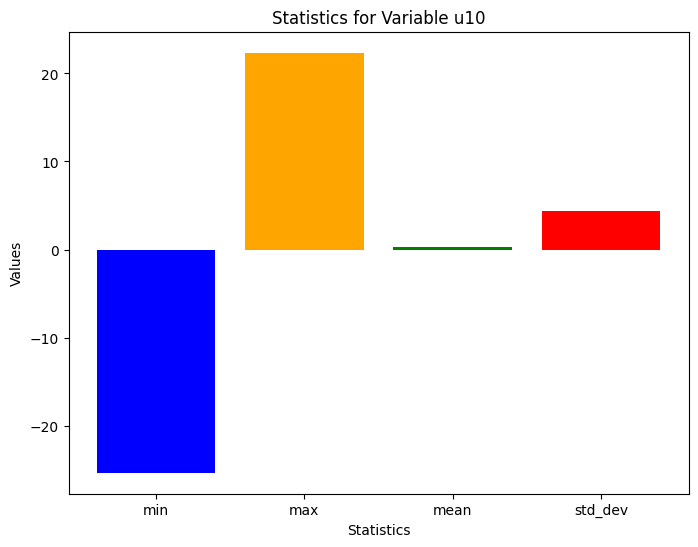

In [67]:
plot_statistics(statistics)

### Visualizations

Give the 3D variable you want to visualize:  u10


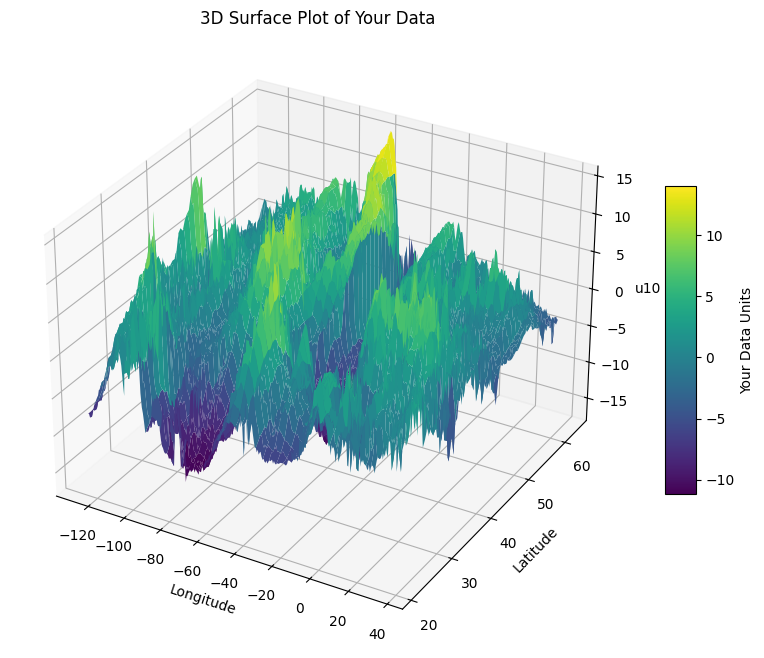

In [68]:
visualize(dataset)

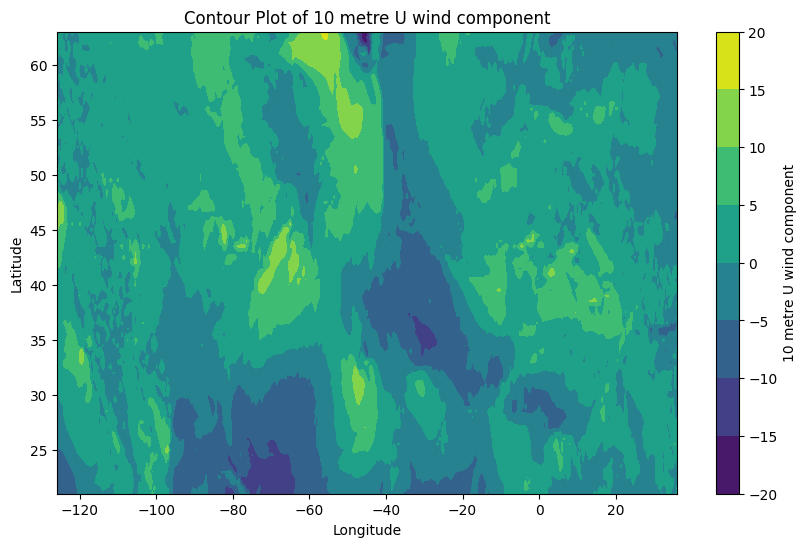

In [69]:
U_wind_component = dataset.variables['u10'][:]
lons = dataset.variables['longitude'][:]
lats = dataset.variables['latitude'][:]
plt.figure(figsize=(10, 6))
plt.contourf(lons, lats, U_wind_component[0, :, :], cmap='viridis')
plt.colorbar(label='10 metre U wind component')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Contour Plot of 10 metre U wind component')
plt.show()

## Northward 10-meter wind component

### Statistics

In [70]:
variable_name = 'v10'  # Example variable name
statistics = describe_variable(dataset, variable_name)
print(statistics)

{'min': -25.862564086914062, 'max': 26.948501586914062, 'mean': -0.01367199224739445, 'std_dev': 5.105907821497976}


In [71]:
plot_statistics(statistics)

### Visualizations

Give the 3D variable you want to visualize:  v10


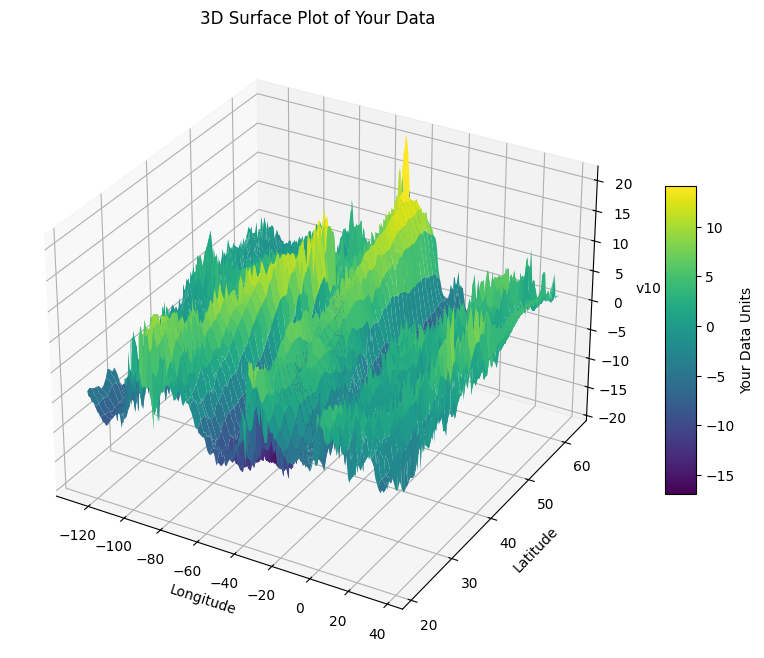

In [72]:
visualize(dataset)

In [73]:
u10 = dataset.variables['u10'][:]
v10 = dataset.variables['v10'][:]

# Flatten the arrays for plotting
u10_flat = u10.flatten()
v10_flat = v10.flatten()

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram with KDE for 'u10'
plt.subplot(1, 2, 1)
sns.histplot(u10_flat, kde=True, color='blue', bins=20)
plt.xlabel('Wind Speed (u10)')
plt.ylabel('Density')
plt.title('Distribution of Wind Speed (u10)')

# Plot histogram with KDE for 'v10'
plt.subplot(1, 2, 2)
sns.histplot(v10_flat, kde=True, color='green', bins=20)
plt.xlabel('Wind Speed (v10)')
plt.ylabel('Density')
plt.title('Distribution of Wind Speed (v10)')

plt.tight_layout()
plt.show()

# Radiations

## Surface solar radiation downward

### Statistics

In [74]:
variable_name = 'ssrd'  # Example variable name
statistics = describe_variable(dataset, variable_name)
print(statistics)

{'min': 0.0, 'max': 78080537.4375, 'mean': 12839379.599587215, 'std_dev': 13252074.602225913}


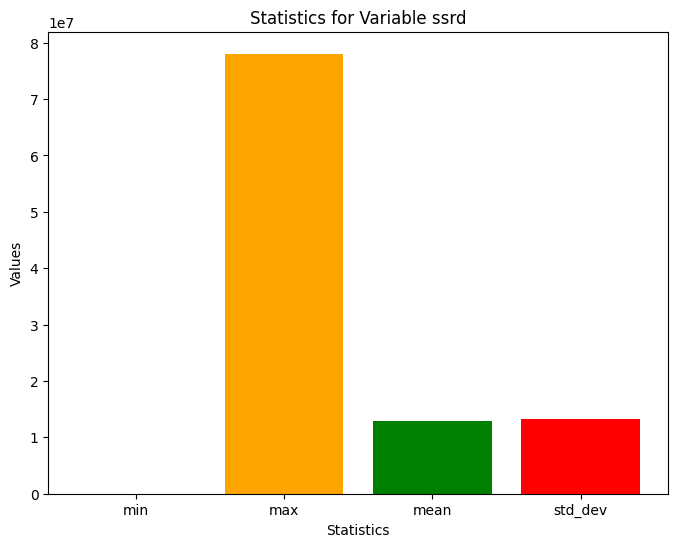

In [75]:
plot_statistics(statistics)

### Visualizations

In [76]:
visualize(dataset)

Give the 3D variable you want to visualize:  ssrd


In [77]:
ssrd = dataset.variables['ssrd'][:]
plt.figure(figsize=(8, 6))
plt.hist(ssrd.flatten(), bins=20, color='orange', alpha=0.7)
plt.xlabel('Surface Solar Radiation (J/m^2)')
plt.ylabel('Frequency')
plt.title('Distribution of Surface Solar Radiation (SSRD)')
plt.grid(True)
plt.show()


## Surface thermal radiation downward

### Statistics

In [78]:
variable_name = 'strd'  # Example variable name
statistics = describe_variable(dataset, variable_name)
print(statistics)

{'min': 0.0, 'max': 133995408.0, 'mean': 47843547.5088755, 'std_dev': 29676582.788996417}


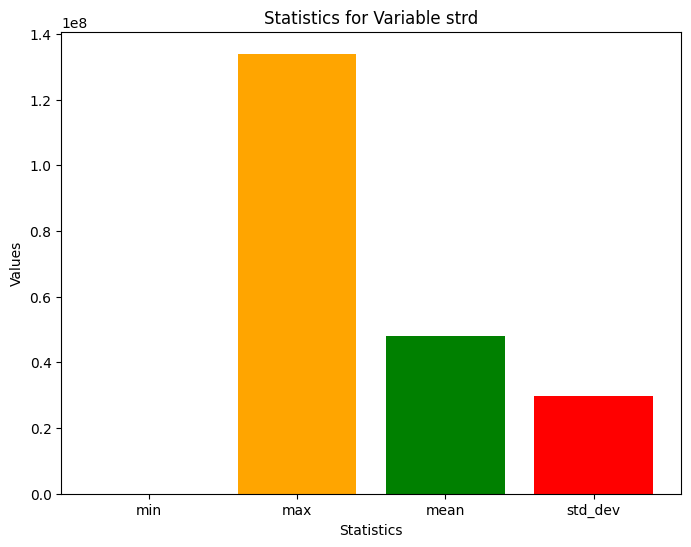

In [79]:
plot_statistics(statistics)

### Visualizations

Give the 3D variable you want to visualize:  strd


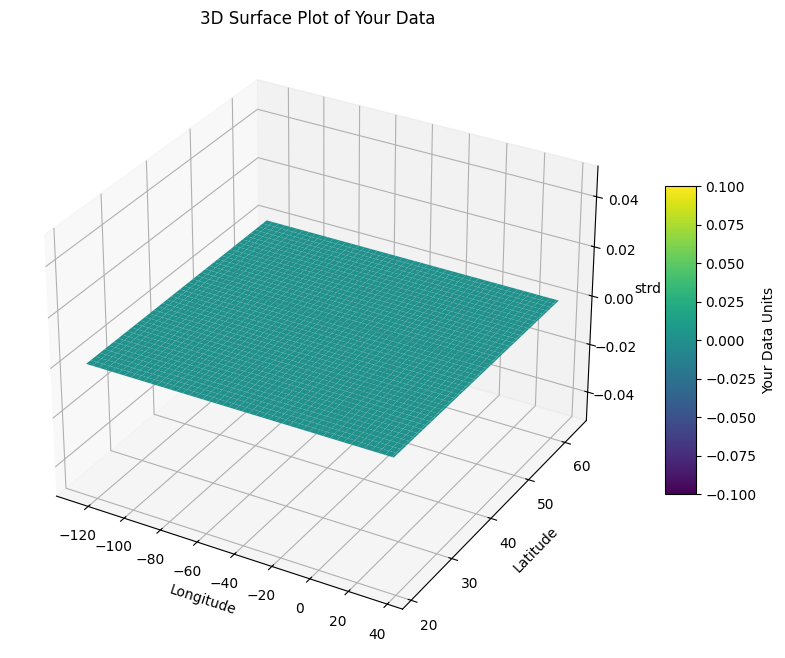

In [80]:
visualize(dataset)

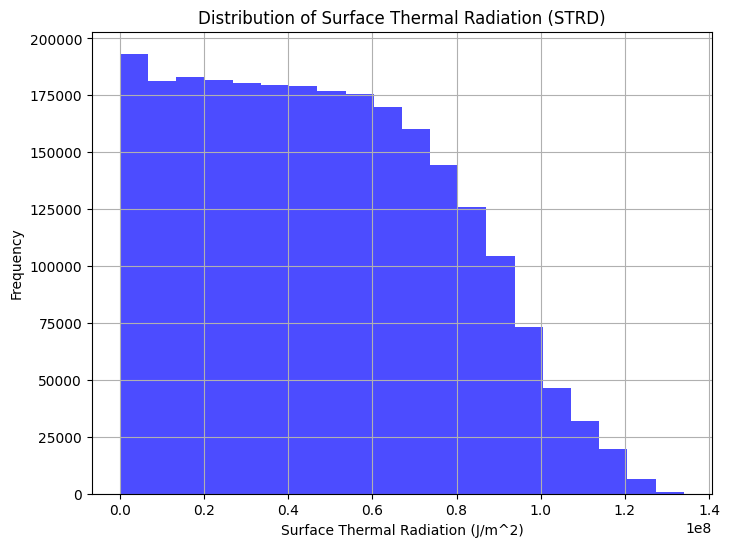

In [81]:
strd = dataset.variables['strd'][:]
plt.figure(figsize=(8, 6))
plt.hist(strd.flatten(), bins=20, color='blue', alpha=0.7)
plt.xlabel('Surface Thermal Radiation (J/m^2)')
plt.ylabel('Frequency')
plt.title('Distribution of Surface Thermal Radiation (STRD)')
plt.grid(True)
plt.show()

## TOA incident solar radiation

### Statistics

In [82]:
variable_name = 'tisr'  # Example variable name
statistics = describe_variable(dataset, variable_name)
print(statistics)

{'min': 7.450580596923828e-09, 'max': 101056518.0, 'mean': 25807676.34371703, 'std_dev': 22102644.495540477}


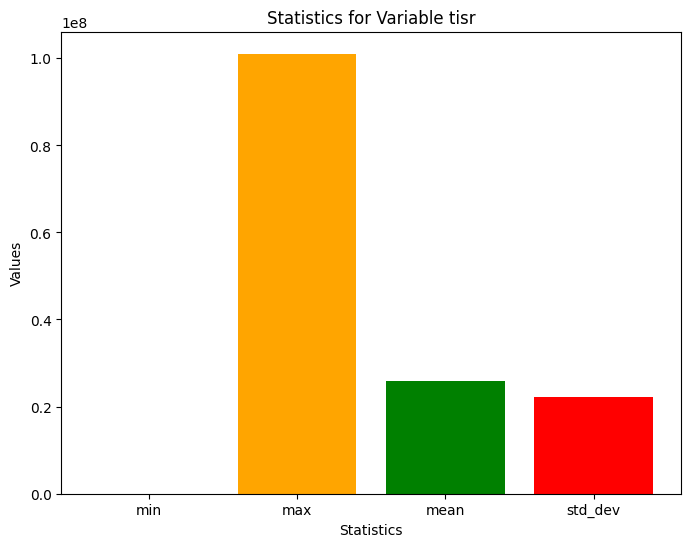

In [83]:
plot_statistics(statistics)

### Visualizations

Give the 3D variable you want to visualize:  tisr


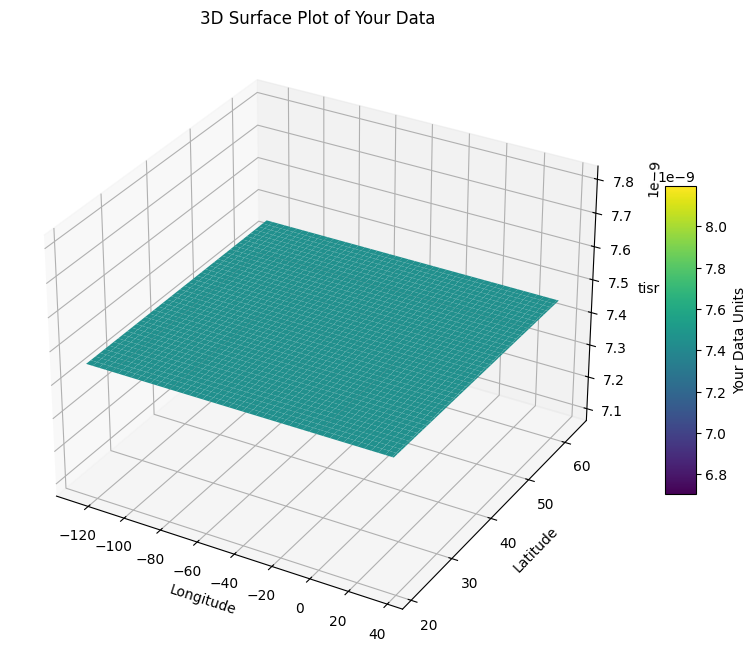

In [84]:
visualize(dataset)

In [85]:
tisr = dataset.variables['tisr'][:]
plt.figure(figsize=(8, 6))
plt.hist(tisr.flatten(), bins=20, color='green', alpha=0.7)
plt.xlabel('TOA Incident Solar Radiation (J/m^2)')
plt.ylabel('Frequency')
plt.title('Distribution of TOA Incident Solar Radiation (TISR)')
plt.grid(True)
plt.show()

# Missing Values

In [86]:
print_missing_values(dataset)

Variable: longitude, Missing Values Count: 0
Variable: latitude, Missing Values Count: 0
Variable: time, Missing Values Count: 0
Variable: fdir, Missing Values Count: 0
Variable: sp, Missing Values Count: 0
Variable: tcwv, Missing Values Count: 0
Variable: u10, Missing Values Count: 0
Variable: v10, Missing Values Count: 0
Variable: t2m, Missing Values Count: 0
Variable: d2m, Missing Values Count: 0
Variable: ssrd, Missing Values Count: 0
Variable: strd, Missing Values Count: 0
Variable: lcc, Missing Values Count: 0
Variable: tco3, Missing Values Count: 0
Variable: tisr, Missing Values Count: 0
Variable: tp, Missing Values Count: 0
Variable: fal, Missing Values Count: 0


# Plausibility Check

In [117]:
dataset = nc.Dataset("../files/EMCWF/ECMWF_HRES_12Z_20201231.nc")
variable_ranges = {
    't2m': (200, 330),  # Rough estimate of range for temperature in  Kelvin
    'u10': (-50, 50),   # Rough estimate of range for u-component of wind speed in m/s
    'v10': (-50, 50)    # Rough estimate of range for v-component of wind speed in m/s
}

# Perform plausibility checks
results = {}

for variable_name, variable_range in variable_ranges.items():
    variable_data = dataset.variables[variable_name][:]
    invalid_values = variable_data[(variable_data < variable_range[0]) | (variable_data > variable_range[1])]
    results[variable_name] = len(invalid_values)

fig, ax = plt.subplots(figsize=(10, 6))

variables = list(results.keys())
values = list(results.values())

ax.barh(variables, values, color='skyblue')
ax.set_xlabel('Number of Values Outside Acceptable Range')
ax.set_ylabel('Variables')
ax.set_title('Plausibility Checks for Variables')

plt.show()

This Plausibility Check does not mention the Radiation Variables because they are considered as 'Accumulated Variables'.

## Accumulation (Radiation Variables)

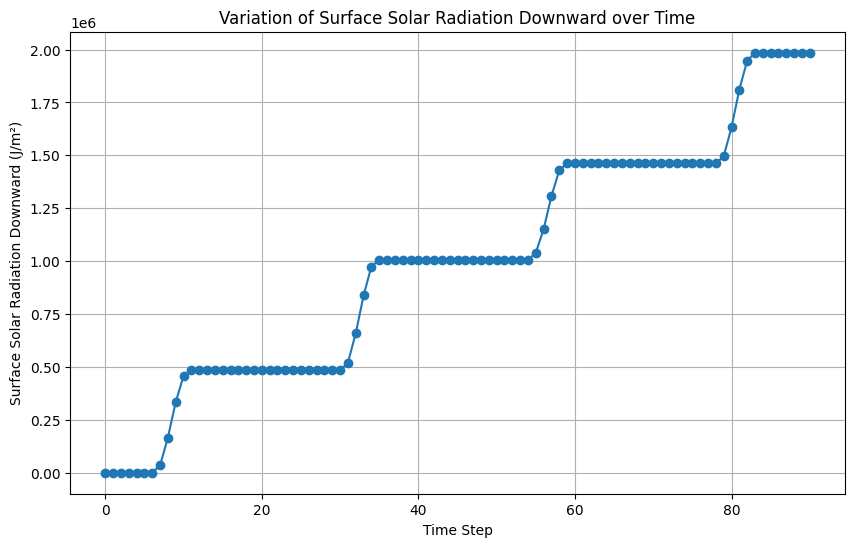

In [113]:
dataset = nc.Dataset("../files/EMCWF/ECMWF_HRES_12Z_20201231.nc")
ssrd_variable = dataset.variables['ssrd']

# Get the time dimension size
num_time_steps = ssrd_variable.shape[0]

# Plot the values of ssrd across time steps
plt.figure(figsize=(10, 6))
plt.plot(range(num_time_steps), ssrd_variable[:, 0, 0], marker='o', linestyle='-')
plt.xlabel('Time Step')
plt.ylabel('Surface Solar Radiation Downward (J/m²)')
plt.title('Variation of Surface Solar Radiation Downward over Time')
plt.grid(True)
plt.show()

As shown in this variation plot: the Surface Solar Radiation values are accumulating over time (Time step = 1 hour).
This applies to all Radiation Variables.
you can find more informations here: https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation#ERA5:datadocumentation-Parameterlistings